In [1]:
START_DATE = "01-01-2020"
END_DATE = "12-20-2020"

### Let's play around with a timeseries generator

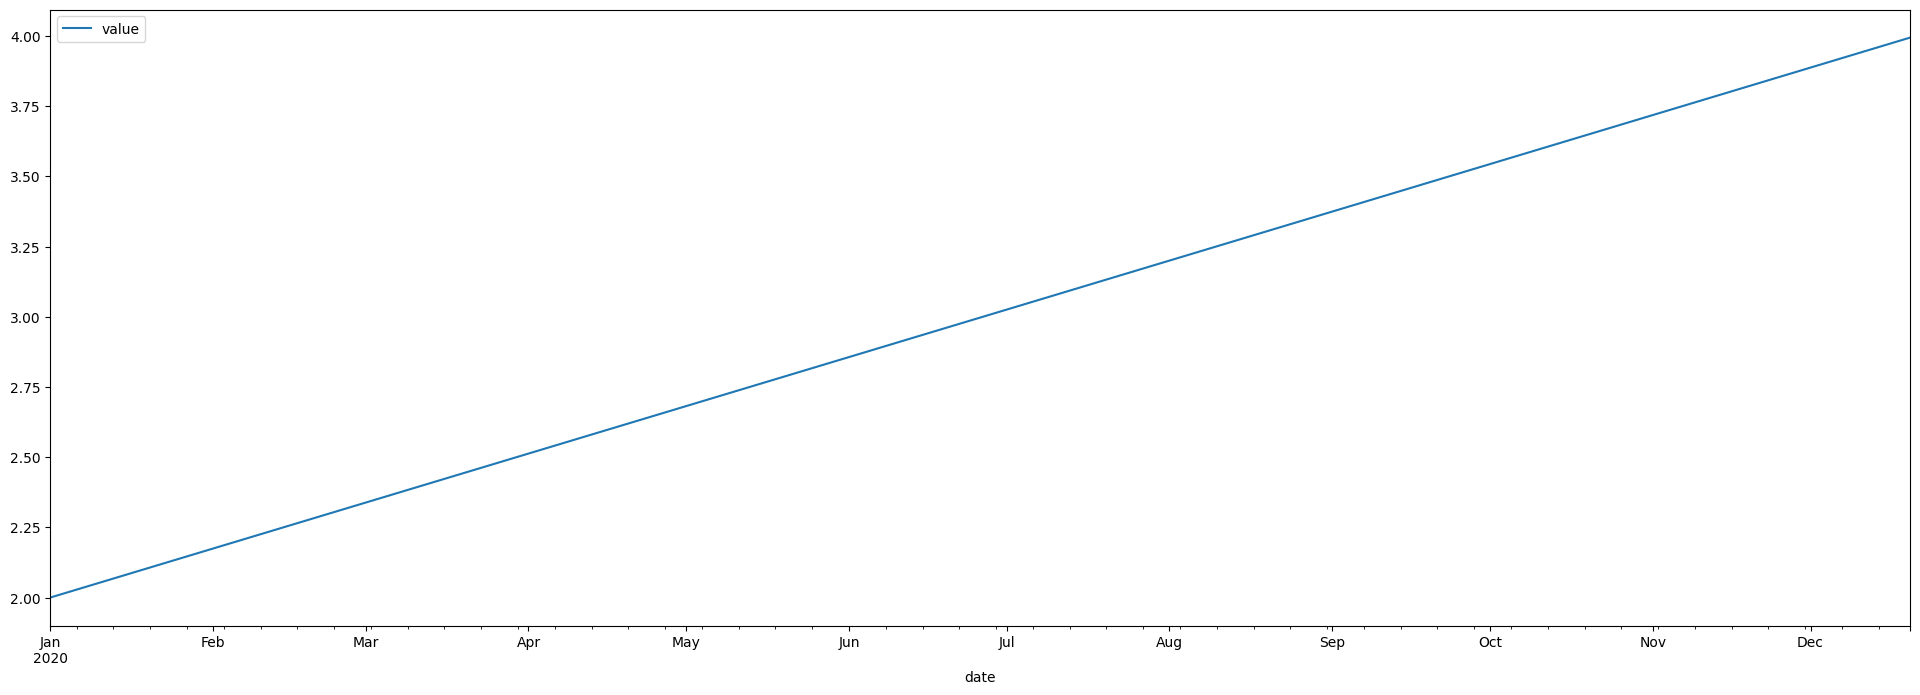

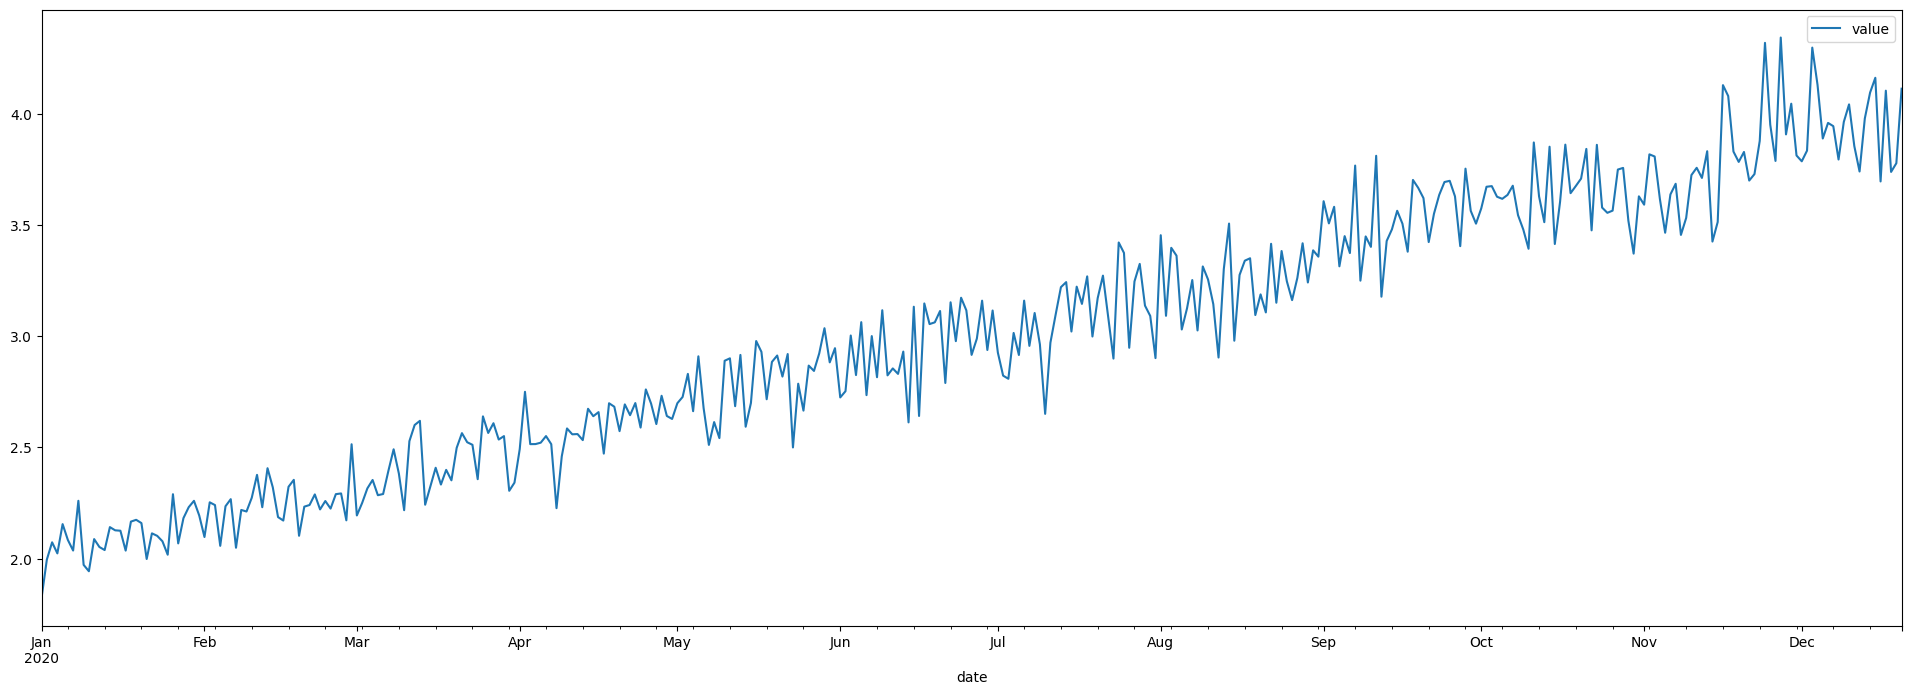

In [2]:
from pandas._libs.tslibs.timestamps import Timestamp
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, HolidayFactor, WeekdayFactor
import pandas as pd

# Setting up a linear trend
lt = LinearTrend(coef=2.0, offset=1., col_name="my_linear_trend")
g = Generator(factors={lt}, features=None, date_range=pd.date_range(start=START_DATE, end=END_DATE))
g.generate()
g.plot()

# Adding some white noise to the generator,
# which refers to a series of random values that are UNCORRELATED with each other
wn = WhiteNoise(stdev_factor=0.05)
g.update_factor(wn)
g.generate()
g.plot()

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='date'>)

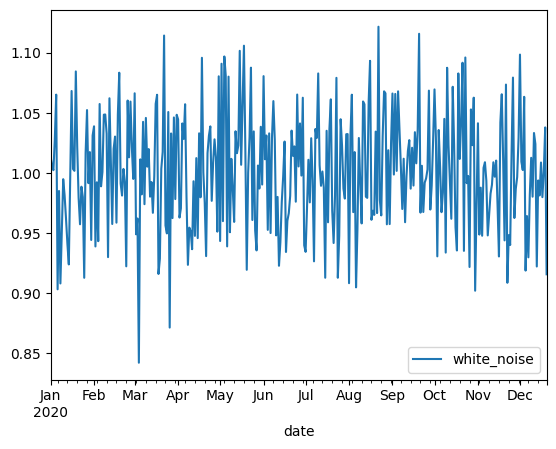

In [3]:
# Let's see how whitenoise looks like 
white_noise = WhiteNoise()
white_noise.plot(start_date=START_DATE, end_date=END_DATE)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='date'>)

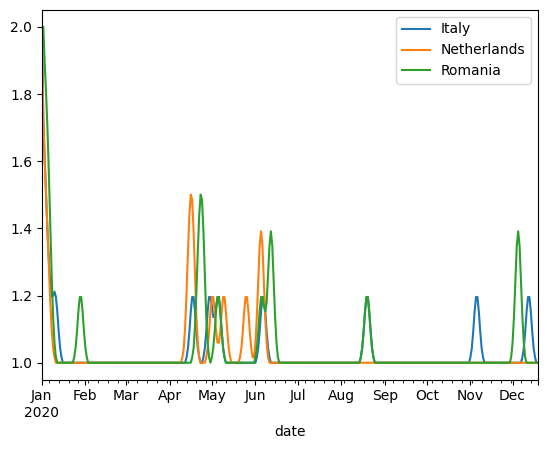

In [4]:
# Add holiday factor, this is often an important factor
# in forecasting problems
holiday_factor = HolidayFactor(
    holiday_factor=2.,
    special_holiday_factors={
        "Christmas Day": 10.
    }
)
holiday_factor.plot(start_date=Timestamp(START_DATE), end_date=Timestamp(END_DATE))

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='date'>)

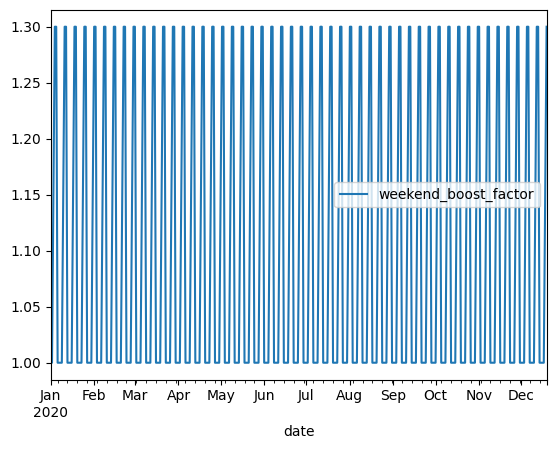

In [5]:
# Add weekday factor
weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.15, 5: 1.3, 6: 1.3}  # Here we assign a factor of 1.15 to Friday, and 1.3 to Sat/Sun 
)
weekday_factor.plot(start_date=START_DATE, end_date=END_DATE)  # Using a smaller time range here to keep the plot viewable

### Create the final dataset

<AxesSubplot:xlabel='date'>

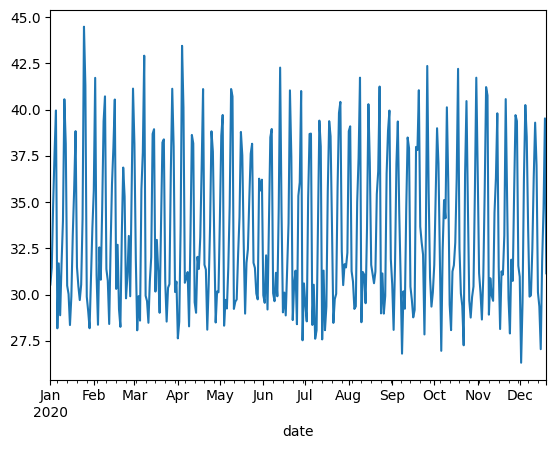

In [6]:
# Combine all factors to create a generator
g: Generator = Generator(
    factors={
        weekday_factor,
        white_noise
    },
    date_range=pd.date_range(start=START_DATE, end=END_DATE),
    base_value=30 # All generated values should be around the base_value
)
    
df = g.generate()
    
plot_df = df.set_index('date')
plot_df["value"].plot()